# グリッドリサーチ

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# アイリスデータセットを読み込む
dataset = datasets.load_iris()

X = dataset.data
y = dataset.target

model = DecisionTreeClassifier()

# 試行するパラメータの羅列
params = {
    'max_depth': list(range(1, 20)),
    'criterion': ['gini', 'entropy'],
}

# cv=10は10分割の交差検証を実行
grid_search = GridSearchCV(model, param_grid=params, cv=10)

grid_search.fit(X, y)

print(grid_search.best_score_)     # 最も良かったスコアを出力
print(grid_search.best_estimator_) # 最適なモデルを出力
print(grid_search.best_params_)    # 上記を記録したパラメータの組み合わせを出力

0.96
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'criterion': 'gini', 'max_depth': 3}


# ロジスティック回帰のハイパーパラメータ

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 乳がんのデータセット
data = load_breast_cancer()

x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=100)


model1 = LogisticRegression() # Cのデフォルトは1.0
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print("パラメータチューニング前：", accuracy_score(y_test, pred)) # パラメータチューニング前： 0.9870629370629371

# print(model1.intercept_) # 切片
# print(model1.coef_)　     # 重み

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "solver" :  ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], "warm_start": [True, False]}

grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最もよかったパラメータの組み合わせを取得
print(grid_search.best_params_ ) 

"""
{'C': 100, 'solver': 'newton-cg', 'warm_start': True}
"""

print(grid_search.best_estimator_)
"""
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=True)
"""

c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


パラメータチューニング前： 0.958041958041958


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

{'C': 100, 'solver': 'newton-cg', 'warm_start': True}
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=True)


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


"\nLogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='warn',\n          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',\n          tol=0.0001, verbose=0, warm_start=True)\n"

# 線形SVMのハイパーパラメータ

In [6]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 乳がんのデータセット
data = load_breast_cancer()

x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=2)


model1 = LinearSVC()
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print("パラメータチューニング前：", accuracy_score(y_test, pred)) 


param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_ ) 
print(grid_search.best_estimator_)

best_model = LogisticRegression(C=10)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
print("パラメータチューニング後：", accuracy_score(y_test, pred)) 

パラメータチューニング前： 0.9370629370629371


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ValueError: Invalid parameter C for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

# 非線形SVMのハイパーパラメータ

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 手書き数字のデータセット
data = load_digits()

x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=2)


model1 = SVC()
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print("パラメータチューニング前：", accuracy_score(y_test, pred)) # パラメータチューニング前： 0.4288888888888889


param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_ ) 
print(grid_search.best_estimator_)

best_model = LogisticRegression(C=10)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
print("パラメータチューニング後：", accuracy_score(y_test, pred)) 

c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


パラメータチューニング前： 0.4288888888888889


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\

{'C': 10}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
パラメータチューニング後： 0.9444444444444444


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# 決定木のハイパーパラメータ

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 乳がんのデータセット
data = load_breast_cancer()

x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=2)


model1 =DecisionTreeClassifier(max_depth=3) 
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print("パラメータチューニング前：", accuracy_score(y_test, pred))

param_grid = {"max_depth": [0.001, 0.01, 0.1, 1, 10, 100], "criterion": ['gini','entropy']}

grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最もよかったパラメータの組み合わせを取得
print(grid_search.best_params_ ) 
"""
{'criterion': 'entropy', 'max_depth': 10}
"""

print(grid_search.best_estimator_)

"""""
出力結果
パラメータチューニング前： 0.9230769230769231
{'criterion': 'gini', 'max_depth': 10}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
"""""

パラメータチューニング前： 0.9230769230769231
{'criterion': 'gini', 'max_depth': 10}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


'""\n出力結果\nパラメータチューニング前： 0.9230769230769231\n{\'criterion\': \'gini\', \'max_depth\': 10}\nDecisionTreeClassifier(class_weight=None, criterion=\'gini\', max_depth=10,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter=\'best\')\n'

# ランダムフォレスト

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 乳がんのデータセット
data = load_breast_cancer()

x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=2)


model1 =RandomForestClassifier(max_depth=3) 
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print("パラメータチューニング前：", accuracy_score(y_test, pred))

param_grid = {"max_depth": [0.001, 0.01, 0.1, 1, 10, 100], "criterion": ['gini','entropy']}

grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最もよかったパラメータの組み合わせを取得
print(grid_search.best_params_ ) 
"""
{'criterion': 'entropy', 'max_depth': 100}
"""

print(grid_search.best_estimator_)
"""""
出力結果
パラメータチューニング前： 0.916083916083916
{'criterion': 'entropy', 'max_depth': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
"""""

c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


パラメータチューニング前： 0.9230769230769231
{'criterion': 'gini', 'max_depth': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


'""\n出力結果\nパラメータチューニング前： 0.916083916083916\n{\'criterion\': \'entropy\', \'max_depth\': 100}\nRandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\',\n                       max_depth=100, max_features=\'auto\', max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=10,\n                       n_jobs=None, oob_score=False, random_state=None,\n                       verbose=0, warm_start=False)\n'

In [10]:
model2 =RandomForestClassifier(max_depth=100,criterion = "entropy") 
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
print("パラメータチューニング後：", accuracy_score(y_test, pred))

"""""
出力結果
パラメータチューニング後： 0.9440559440559441
"""""

パラメータチューニング後： 0.9440559440559441


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'""\n出力結果\nパラメータチューニング後： 0.9440559440559441\n'

# ランダムフォレストを用いた特徴量の重要度測定

## Embedded Method(組み込み法)

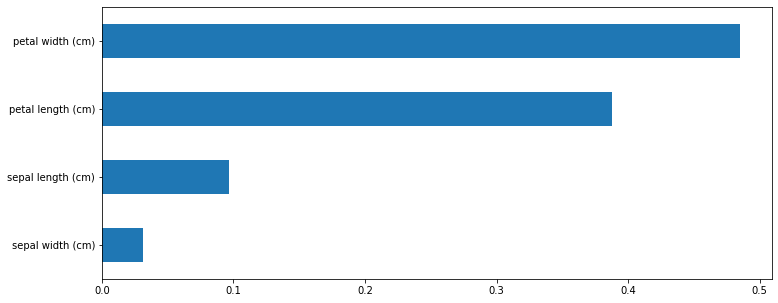

In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
x = iris.data
y = iris.target

df = pd.DataFrame(iris.data, columns=iris.feature_names)

feature_name = iris.feature_names

# トレーニングデータをテストデータに分解
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

# 学習
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(x_train, y_train)

# 予測データ作成
pred = model.predict(x_train)

# 特徴量重要を抽出
feature_importance = model.feature_importances_

# 可視化
feature_importance = pd.Series(feature_importance,index=feature_name)
values = feature_importance.sort_values()
values.plot(kind='barh', figsize=(12, 5))

# ニューラルネットワークのハイパーパラメータ

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # 多層パーセプトロン

# データの読み込み
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 勾配降下法の最適化アルゴリズムをSGD(確率的勾配降下法)に設定
clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
clf.fit(X_train, y_train)
print("SGD", clf.score(X_test, y_test))

# 勾配降下法の最適化アルゴリズムをAdamに設定
clf = MLPClassifier(solver="adam",random_state=0,max_iter=10000)
clf.fit(X_train, y_train)
print("Adam:", clf.score(X_test, y_test))

SGD 0.9555555555555556
Adam: 0.9777777777777777
